<a href="https://colab.research.google.com/github/ChrisHallak/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1] - Import Libraries

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import warnings


warnings.filterwarnings('ignore')
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# [2] - Reading Data

In [ ]:
books = pd.read_csv('Books.csv', header=0)
ratings = pd.read_csv('Ratings.csv', header=0)
users = pd.read_csv('Users.csv',header=0)

print(books.shape)
print(ratings.shape)
print(users.shape)
print('------------------')

users = users.dropna()
books = books.dropna()
ratings = ratings.dropna()

books.reset_index(drop = True, inplace = True)
users.reset_index(drop=True, inplace=True)
ratings.reset_index(drop=True,inplace=True)

print(books.shape)
print(ratings.shape)
print(users.shape)


users = users[:2000]
books = books[:2000]



(271360, 8)
(1149780, 3)
(278858, 3)
------------------
(271354, 8)
(1149780, 3)
(168096, 3)


In [ ]:
print(books.shape)
print(ratings.shape)
print(users.shape)


(2000, 8)
(1149780, 3)
(2000, 3)


# Helper Function

In [ ]:
def bar_plot(df,column,xlabel,ylabel,title):
  dic = {}
  for v in df[column]:
    if str(v) not in dic:
      dic[str(v)] = 0
    dic[str(v)] +=1

  dics = {k:v for k, v in sorted(dic.items())}

  fig = plt.figure(figsize =(60, 15))
  plt.bar(list(dics.keys()),list(dics.values()), color = 'red')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.margins(x = 0)
  plt.show()
#-----------------------------------------------------------
def book_name(df,isbn):
  return str(df[df['ISBN'] == isbn]['Book-Title'])


#[3] - Preprocessing the data







## [3.1] - Preprocessing Books Dataset

In [ ]:
print('Shape of books dataset : ',books.shape)

Shape of books dataset :  (2000, 8)


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
print('Books columns : ',list(books.columns.values))

Books columns :  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [ ]:
# remove unneeded columns from books dataset [Image-URL-S , Image-URL-M , Image-URL-L]
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis = 1,inplace=True)
list(books.columns.values)

['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 2000 non-null   object
 1   Book-Title           2000 non-null   object
 2   Book-Author          2000 non-null   object
 3   Year-Of-Publication  2000 non-null   object
 4   Publisher            2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB


In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
books['Book-Author'].fillna('Other',inplace = True)
books['Publisher'].fillna('Other',inplace=True)

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [ ]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953], dtype=object)

In [ ]:
# notice1: there are invalid values [DK Publishing Inc,Gallimard] in Year-Of-Publication column
indices = books[(books['Year-Of-Publication'] == 'DK Publishing Inc' )
              | (books['Year-Of-Publication'] == 'Gallimard' )].index
books.drop(indices, inplace = True)

## Converting year of publication to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)


# notice2: there are values greater than 2022
indices1 =  books[books['Year-Of-Publication'] > 2022 ].index
books.drop(indices1, inplace = True)

# notice3: there are very small values [0]
# I will remove rows with year of publication less than 250
indices2 =  books[books['Year-Of-Publication'] < 250 ].index
books.drop(indices2, inplace = True)
print('Number of deleted rows is ',len(indices)+len(indices1)+len(indices2))
print("Shape of books dataset after deleting rows",books.shape)

Number of deleted rows is  34
Shape of books dataset after deleting rows (1966, 5)


In [ ]:
## Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True)
books.reset_index(drop = True, inplace = True)

print("Shape of books dataset after deleting dupliacate rows",books.shape)


Shape of books dataset after deleting dupliacate rows (1966, 5)


## [3.2] - Preprocessing Users dataset

In [ ]:
print('Shape of users dataset : ',users.shape)

Shape of users dataset :  (2000, 3)


In [ ]:
users.head()

,User-ID,Location,Age
0,2,"stockton, california, usa",18.0
1,4,"porto, v.n.gaia, portugal",17.0
2,6,"santa monica, california, usa",61.0
3,10,"albacete, wisconsin, spain",26.0
4,11,"melbourne, victoria, australia",14.0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   2000 non-null   int64  
 1   Location  2000 non-null   object 
 2   Age       2000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [ ]:

print(users['Age'].unique())

[ 18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.  23.
  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.  53.
  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.  29.
  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.  67.
   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.  75.
 231.   3.  76.  83.  68. 119.]


In [ ]:
# notice1 : there are nan values
# notice2 : there are outliers very big ages ,very small ages
# I will replace the nan values and outliers[less than 10 , greater than 90] with median
# mean affected by outliers

# calculate the median
s = users.dropna(subset=['Age'])['Age']
s=sorted(s)

med = statistics.median(s)
print('Median : ',med)


# replace nan values and outliers with median
users.loc[users['Age'] > 90, 'Age'] = med
users.loc[users['Age'] < 10, 'Age'] = med
users['Age'] = users['Age'].fillna(med)
users['Age'] = users['Age'].astype(float)

users['Age'].unique()

Median :  29.0


array([18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20., 34.,
       23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42., 50.,
       39., 53., 47., 36., 28., 35., 13., 58., 49., 38., 45., 62., 63.,
       27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59., 48.,
       72., 56., 67., 80., 52., 69., 71., 73., 78., 64., 12., 74., 75.,
       76., 83., 68.])

In [ ]:
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [ ]:
users.shape

(2000, 3)

In [ ]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

##[3.3] - Preprocessing Rating Dataset

In [ ]:
print('Shape of rating dataset : ',ratings.shape)

Shape of rating dataset :  (1149780, 3)


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
# I will remove rows if	User-ID is not in Users dataset and ISBN is not in Books dataset

# first get the User_ID from Users dataset and get ISBN from Books dataset
all_users_ID = users['User-ID'].values
all_books_ISBN = books['ISBN'].values


print('Shape of ratings dataset before removing',ratings.shape)
indices = ratings[(~ratings['User-ID'].isin(all_users_ID)) | (~ratings['ISBN'].isin(all_books_ISBN))].index
ratings.drop(indices, inplace = True)
print('Shape of ratings dataset after removing',ratings.shape)


Shape of ratings dataset before removing (1149780, 3)
Shape of ratings dataset after removing (1743, 3)


In [ ]:
ratings['Book-Rating'].unique()

array([ 0,  7,  8,  9, 10,  5,  6,  3,  4,  2,  1])

In [ ]:
# Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)
print('Shape of ratings dataset after removing',ratings.shape)


Shape of ratings dataset after removing (1743, 3)


# [4] - Data Visualization

### this plot shows Number of books published yearly

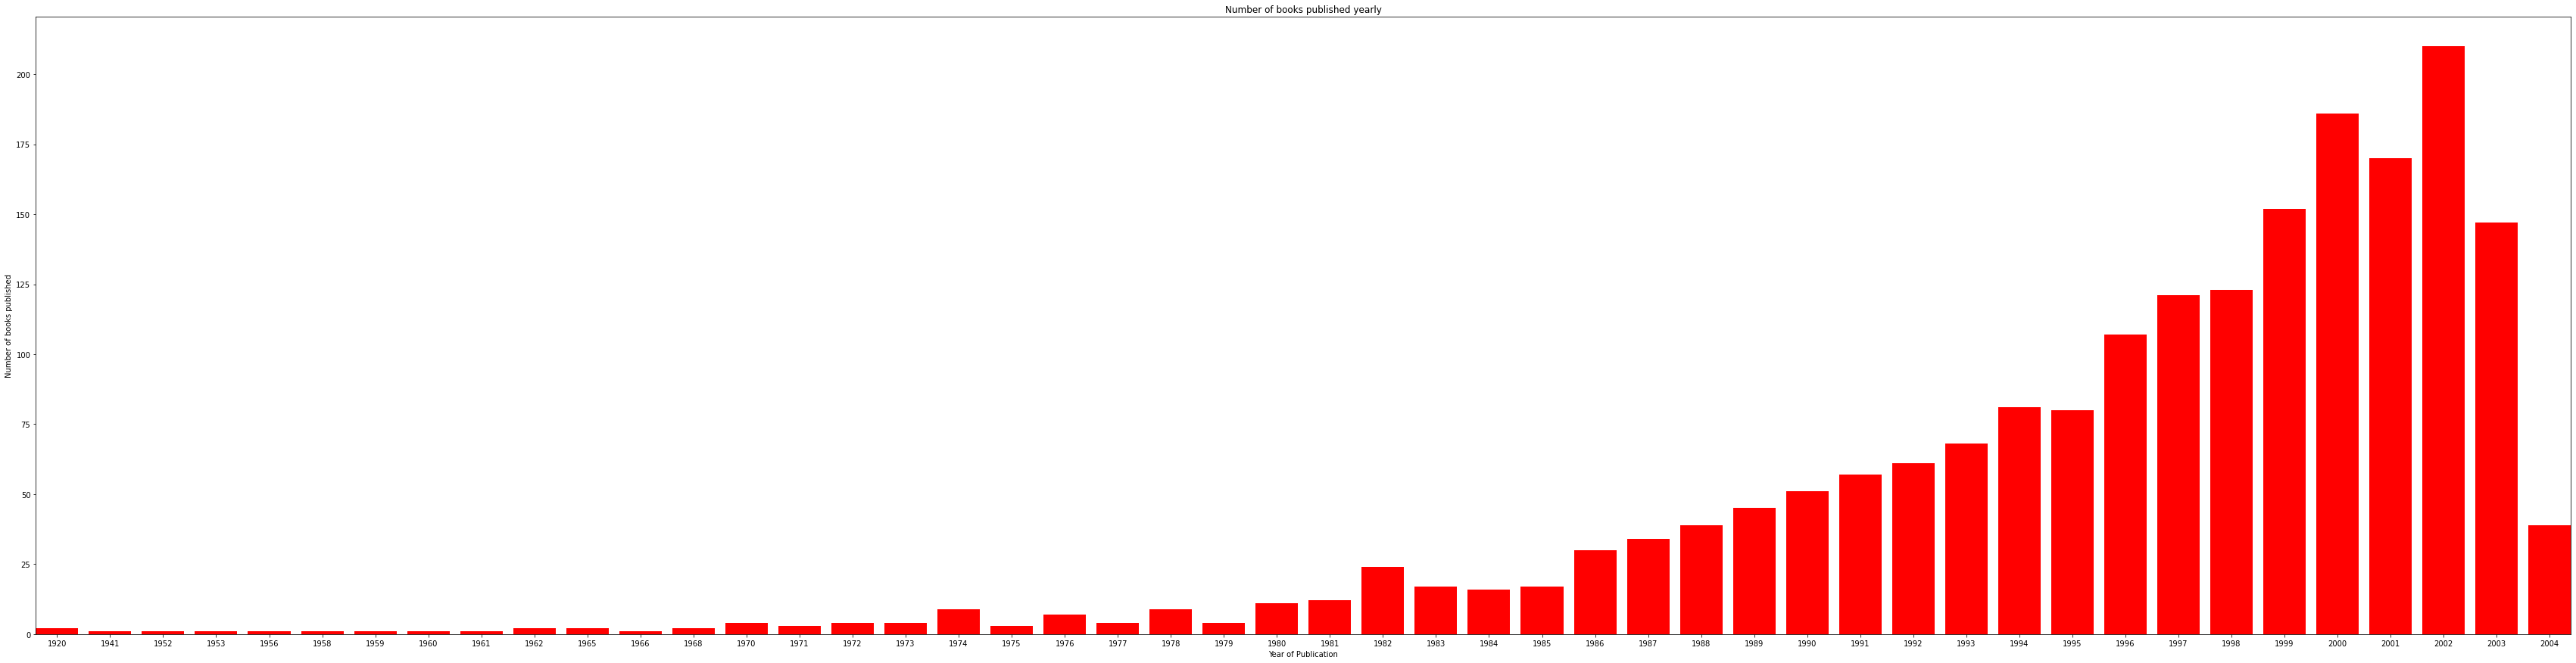

In [ ]:
bar_plot(books,'Year-Of-Publication',"Year of Publication","Number of books published","Number of books published yearly")

### this plot shows age distribution

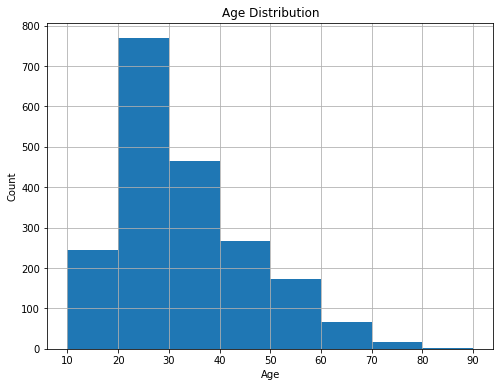

In [ ]:
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

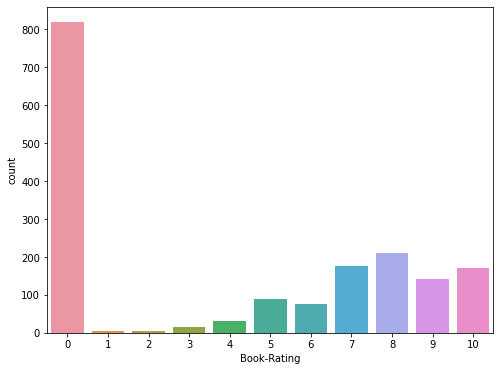

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings)

Text(0.5, 1.0, 'Explicit Ratings')

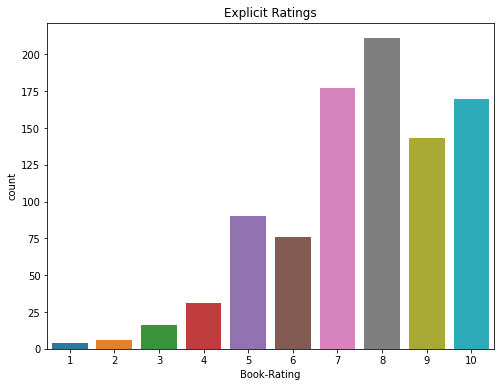

In [ ]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

# [5] - Spliting Data


In [ ]:
threshold_date = 2000
ids = books[books['Year-Of-Publication'] < threshold_date]['ISBN'].values

training_data = ratings[ratings['ISBN'].isin(ids)]
print(f'Training data size: {training_data.shape}')
testing_data = ratings[~ratings['ISBN'].isin(ids)]
print(f'Testing data size: {testing_data.shape}')


Training data size: (1032, 3)
Testing data size: (711, 3)


In [ ]:
training_data.head()

,User-ID,ISBN,Book-Rating
3,20,0425163091,0
4,36,067176537X,0
8,44,0440223571,8
9,44,0812523873,0
11,51,0440225701,9


In [ ]:
testing_data.head()

,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,10,1841721522,0
2,19,0375759778,7
5,42,0553582747,7
6,44,0425182908,0


# [6] - Evaluating

In [ ]:
def get_favorite_books(user_id, ratings_df):
    favorites = ratings_df[(ratings_df['User-ID'] == user_id) & (ratings_df['Book-Rating'] >= 3.5)].sort_values(by='Book-Rating', ascending=False)['ISBN']
    return set(favorites if type(favorites) == pd.Series else [favorites])

In [ ]:
class ModelEvaluator:
  def __init__(self, training_data, testing_data, threshold=3.5):
    self.training_data = training_data
    self.testing_data = testing_data
    self.threshold = threshold

  def evaluate_model_for_user(self, model, user_id):
      #Getting the items in test set
      favorites_in_test = get_favorite_books(user_id, self.testing_data)

      #Getting a ranked recommendation list from a model for a given user (ISBN, predicted_rating)
      person_recs_df = model.recommend_items(user_id,items_to_ignore=get_favorite_books(user_id, self.training_data))

      # get only books with predicated rating >= 3.5
      person_recs_df = person_recs_df[person_recs_df['predicted_rating'] >= self.threshold].sort_values(by='predicted_rating', ascending=False)
      true_relevent = person_recs_df[person_recs_df['ISBN'].isin(favorites_in_test)].shape[0]

      top_5_recommended = person_recs_df.head(5)
      top_10_recommended = person_recs_df.head(10)

      # Number of relevant and recommended items in top k
      hits_at_5_count = top_5_recommended[top_5_recommended['ISBN'].isin(favorites_in_test)].shape[0]
      hits_at_10_count = top_10_recommended[top_10_recommended['ISBN'].isin(favorites_in_test)].shape[0]

      precision_at_5 = hits_at_5_count / top_5_recommended.shape[0] if top_5_recommended.shape[0] != 0 else 1
      recall_at_5 = hits_at_5_count / true_relevent if true_relevent != 0 else 1

      precision_at_10 = hits_at_10_count / top_10_recommended.shape[0] if top_10_recommended.shape[0] != 0 else 1
      recall_at_10 = hits_at_10_count / true_relevent if true_relevent != 0 else 1

      person_metrics = {'hits@5_count':hits_at_5_count,
                        'hits@10_count':hits_at_10_count,
                        'recommended@5_count':top_5_recommended.shape[0],
                        'recommended@10_count':top_10_recommended.shape[0],
                        'relevents': true_relevent,
                        'recall@5': recall_at_5,
                        'recall@10': recall_at_10,
                        'precision@5': precision_at_5,
                        'precision@10': precision_at_10}
      return person_metrics


  def evaluate_model(self, model):
      users_metrics = []
      users_ids = list(set(self.testing_data['User-ID'].values))
      for idx, user_id in enumerate(users_ids):
          metrics = self.evaluate_model_for_user(model, user_id)
          metrics['user_id'] = user_id
          users_metrics.append(metrics)
      print('%d users processed' % idx)

      detailed_results_df = pd.DataFrame(users_metrics) \
                          .sort_values('hits@5_count', ascending=False)

      a = float(detailed_results_df['relevents'].sum())
      b = float(detailed_results_df['relevents'].sum())
      c =  float(detailed_results_df['recommended@5_count'].sum())
      d = float(detailed_results_df['recommended@10_count'].sum())

      a = a if a != 0 else 0.1
      b = b if b != 0 else 0.1
      c = c if c != 0 else 0.1
      d = d if d != 0 else 0.1

      global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / a
      global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / b

      global_precision_at_5 = detailed_results_df['hits@5_count'].sum() /c
      global_precision_at_10 = detailed_results_df['hits@10_count'].sum() / d

      global_metrics = {'modelName': model.get_model_name(),
                        'recall@5': global_recall_at_5,
                        'recall@10': global_recall_at_10,
                        'precision@5': global_precision_at_5,
                        'precision@10': global_precision_at_10}
      return global_metrics, detailed_results_df

model_evaluator = ModelEvaluator(training_data, testing_data)

# [7] - Building Model

## [7-1] - Popularity Based

In [ ]:
populartiy = ratings.groupby('ISBN').agg({'Book-Rating': ['mean', 'count']}).reset_index()
populartiy.columns = ['ISBN', 'ratings_mean', 'ratings_count']
populartiy.sort_values(by='ratings_mean', ascending=False)

,ISBN,ratings_mean,ratings_count
233,0345305477,10.0,1
1191,1569314195,10.0,1
136,014056232X,10.0,1
1175,1558744606,10.0,1
1174,155874262X,10.0,1
...,...,...,...
886,067170124X,0.0,1
255,0345368940,0.0,1
889,0671742566,0.0,1
890,0671744003,0.0,1


In [ ]:
def weighted_rating(x, m, C):
  v = x['ratings_count']
  R = x['ratings_mean']
  # Calculation based on the IMDB formula
  return (v/(v+m) * R) + (m/(m+v) * C)



C = populartiy['ratings_mean'].mean()
populartiy['predicted_rating'] = populartiy.apply(lambda x: weighted_rating(x, 6, C), axis=1)

populartiy.head()


,ISBN,ratings_mean,ratings_count,predicted_rating
0,0002740230,7.0,1,4.447853
1,0006276199,0.0,1,3.447853
2,000636988X,9.0,1,4.733568
3,0007100221,7.0,1,4.447853
4,0007108648,0.0,1,3.447853


In [ ]:
class PopularityRecommender:

  MODEL_NAME = 'Popularity'

  def __init__(self, popularities_df):
      self.popularities_df = popularities_df

  def get_model_name(self):
      return self.MODEL_NAME


  def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):

      recommendations_df = self.popularities_df[~self.popularities_df['ISBN'].isin(items_to_ignore)] \
                              .sort_values('predicted_rating', ascending = False) \
                              .head(topn)

      return recommendations_df


popularity_model = PopularityRecommender(populartiy)

In [ ]:
print('Evaluating Popularity recommendation model...')
pop_global_metrics, pop_detailed_results_df = model_evaluator.evaluate_model(popularity_model)
print('\nGlobal metrics:\n%s' % pop_global_metrics)
pop_detailed_results_df.head(10)

Evaluating Popularity recommendation model...
225 users processed

Global metrics:
{'modelName': 'Popularity', 'recall@5': 0.6, 'recall@10': 1.0, 'precision@5': 0.007964601769911504, 'precision@10': 0.00663716814159292}


,hits@5_count,hits@10_count,recommended@5_count,recommended@10_count,relevents,recall@5,recall@10,precision@5,precision@10,user_id
52,1,1,5,10,1,1.0,1.0,0.2,0.1,638
79,1,1,5,10,1,1.0,1.0,0.2,0.1,1211
169,1,1,5,10,1,1.0,1.0,0.2,0.1,882
57,1,1,5,10,1,1.0,1.0,0.2,0.1,2179
193,1,1,5,10,1,1.0,1.0,0.2,0.1,424
15,1,1,5,10,1,1.0,1.0,0.2,0.1,3104
123,1,1,5,10,1,1.0,1.0,0.2,0.1,1803
22,1,1,5,10,1,1.0,1.0,0.2,0.1,1075
103,1,1,5,10,1,1.0,1.0,0.2,0.1,2276
153,0,0,5,10,0,1.0,1.0,0.0,0.0,1360


Notice that all recommendations are the same for all users:

In [ ]:
popularity_model.recommend_items(5)

,ISBN,ratings_mean,ratings_count,predicted_rating
442,0385504209,9.166667,6,6.594581
557,0440219078,9.333333,3,5.792775
944,068484267X,9.000000,3,5.681664
1055,0805063897,8.666667,3,5.570553
781,0553572997,8.666667,3,5.570553
142,0142000663,10.000000,2,5.516872
277,0345409469,10.000000,2,5.516872
459,0394404289,9.500000,2,5.391872
858,0671028375,9.000000,2,5.266872
985,0743412621,9.000000,2,5.266872


In [ ]:
popularity_model.recommend_items(10)

,ISBN,ratings_mean,ratings_count,predicted_rating
442,0385504209,9.166667,6,6.594581
557,0440219078,9.333333,3,5.792775
944,068484267X,9.000000,3,5.681664
1055,0805063897,8.666667,3,5.570553
781,0553572997,8.666667,3,5.570553
142,0142000663,10.000000,2,5.516872
277,0345409469,10.000000,2,5.516872
459,0394404289,9.500000,2,5.391872
858,0671028375,9.000000,2,5.266872
985,0743412621,9.000000,2,5.266872


Let's see these popular books titles:

In [ ]:
ids = popularity_model.recommend_items(10)['ISBN'].values
books[books['ISBN'].isin(ids)]['Book-Title'].values

array(['Nickel and Dimed: On (Not) Getting By in America',
       'The Second Time Around : A Novel', "Angela's Ashes: A Memoir",
       'The Da Vinci Code', 'The Giver (21st Century Reference)',
       'The Demon-Haunted World: Science As a Candle in the Dark',
       'Fatal Voyage',
       'The Grapes of Wrath: John Steinbeck Centennial Edition (1902-2002)',
       'The Prophet', 'The Alienist'], dtype=object)

## [7-2] - Content Based

### [7-2-1] -  Use Book Author as content


In [ ]:
import re

def clean_text(text):
  text = text.lower()
  text = re.sub(r"\x1a","",text)
  text = re.sub("[()]","",text)
  text = re.sub(r"","",text)
  text = re.sub(r"�","",text)
  result = re.sub(r"[(a-z)]", "",text)
  text = re.sub(r"[-()&%$!=*\"#/@;:<>{}=~|.?',_]", "", text)
  text = re.sub(r"[123456789]","",text)
  text = re.sub(r" ","",text)
  return text

clean_text('Christeen33# Hal99lak. U.k_')

'christeenhallakuk'

In [ ]:
clean_text('Mark P. O. Morford')

'markpomorford'

In [ ]:
books['Book-Title-Clean'] = books['Book-Title'].apply(lambda x :clean_text(str(x)))
books['Book-Author-Clean'] = books['Book-Author'].apply(lambda x :clean_text(str(x)))
books['Publisher-Clean'] = books['Publisher'].apply(lambda x :clean_text(str(x)))

books[:3]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Title-Clean,Book-Author-Clean,Publisher-Clean
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,classicalmythology,markpomorford,oxforduniversitypress
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,claracallan,richardbrucewright,harperflamingocanada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,decisioninnormandy,carlodeste,harperperennial


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(books['Book-Author-Clean'])
count_matrix.shape

(1966, 1374)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def normalize(value, old_max, old_min, new_max=5.0, new_min=0.0):
  old_range = (old_max - old_min)
  new_range = (new_max - new_min)
  return (((value - old_min) * new_range) / old_range) + new_min

In [ ]:
class ContentBasedRecommender:

    MODEL_NAME = 'Content-Based'

    def __init__(self, items_ids, items_matrix, training_data, testing_data):
        self.items_ids = items_ids
        self.items_matrix = items_matrix
        self.training_data = training_data
        self.testing_data = testing_data

    def get_model_name(self):
        return self.MODEL_NAME

    def get_item_profile(self, item_id):
        idx = self.items_ids.index(item_id)
        return self.items_matrix[idx].toarray().reshape(-1)

    def get_items_profiles(self, ids):
        items_profiles = np.array([self.get_item_profile(x) for x in ids])
        return items_profiles

    def build_users_profile(self, user_id):
        user_df = self.training_data[self.training_data['User-ID'] == user_id]
        user_items_profiles = self.get_items_profiles(user_df['ISBN'].values)
        user_items_ratings = np.array(user_df['Book-Rating'].values).reshape(-1,1)
        s = np.sum(user_items_ratings)
        if(s == 0):
          s = 0.1

        user_profile = np.sum(np.multiply(user_items_profiles, user_items_ratings), axis=0) / s
        return user_profile

    def get_similar_items_to_user_profile(self, user_id, topn=1000):
        user_profile = self.build_users_profile(user_id).reshape(1, -1)
        if(user_profile.shape[1] == 0):
          return []
        #Computes the cosine similarity between the user profile and all item profiles
        cosine_similarities = cosine_similarity(user_profile, self.items_matrix.toarray())
        #Gets the top similar items
        similar_indices = cosine_similarities.argsort().flatten()[-topn:]
        #Sort the similar items by similarity
        similar_items = sorted([(self.items_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        return similar_items

    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        similar_items = self.get_similar_items_to_user_profile(user_id)
        similar_items_filtered = list(filter(lambda x: x[0] not in items_to_ignore, similar_items))

        recommendations_df = pd.DataFrame(similar_items_filtered, columns=['ISBN', 'predicted_rating']) \
                                    .head(topn)

        recommendations_df['predicted_rating'] = recommendations_df['predicted_rating'].apply(lambda x: normalize(x, 1.0, 0.0))
        return recommendations_df



In [ ]:
print('Evaluating Book-Author-Based Filtering model...')
content_based_recommender_model = ContentBasedRecommender(books['ISBN'].values.tolist(), count_matrix, training_data, testing_data)
cb_global_metrics, cb_detailed_results_df = model_evaluator.evaluate_model(content_based_recommender_model)
print('\nGlobal metrics:\n%s' % cb_global_metrics)
cb_detailed_results_df.head(10)

Evaluating Book-Author-Based Filtering model...
225 users processed

Global metrics:
{'modelName': 'Content-Based', 'recall@5': 0.7, 'recall@10': 1.0, 'precision@5': 0.058823529411764705, 'precision@10': 0.06451612903225806}


,hits@5_count,hits@10_count,recommended@5_count,recommended@10_count,relevents,recall@5,recall@10,precision@5,precision@10,user_id
114,3,5,5,9,5,0.6,1.0,0.6,0.555556,242
136,1,1,5,6,1,1.0,1.0,0.2,0.166667,2854
150,1,1,5,5,1,1.0,1.0,0.2,0.200000,843
104,1,1,1,1,1,1.0,1.0,1.0,1.000000,232
39,1,1,1,1,1,1.0,1.0,1.0,1.000000,1116
155,0,0,0,0,0,1.0,1.0,1.0,1.000000,850
145,0,0,0,0,0,1.0,1.0,1.0,1.000000,2359
146,0,0,5,10,0,1.0,1.0,0.0,0.000000,1343
147,0,0,0,0,0,1.0,1.0,1.0,1.000000,834
148,0,0,0,0,0,1.0,1.0,1.0,1.000000,1863


###[7-2-2] Use Book Title as Content

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(books['Book-Title-Clean'])
count_matrix.shape

(1966, 1941)

In [ ]:
print('Evaluating Book-Title-Based Filtering model...')
content_based_recommender_model = ContentBasedRecommender(books['ISBN'].values.tolist(), count_matrix, training_data, testing_data)
cb_global_metrics, cb_detailed_results_df = model_evaluator.evaluate_model(content_based_recommender_model)
print('\nGlobal metrics:\n%s' % cb_global_metrics)
cb_detailed_results_df.head(10)

Evaluating Book-Title-Based Filtering model...
225 users processed

Global metrics:
{'modelName': 'Content-Based', 'recall@5': 0.0, 'recall@10': 0.0, 'precision@5': 0.0, 'precision@10': 0.0}


,hits@5_count,hits@10_count,recommended@5_count,recommended@10_count,relevents,recall@5,recall@10,precision@5,precision@10,user_id
0,0,0,0,0,0,1,1,1.0,1.0,512
169,0,0,0,0,0,1,1,1.0,1.0,882
143,0,0,0,0,0,1,1,1.0,1.0,2358
144,0,0,0,0,0,1,1,1.0,1.0,1848
145,0,0,0,0,0,1,1,1.0,1.0,2359
146,0,0,0,0,0,1,1,1.0,1.0,1343
147,0,0,0,0,0,1,1,1.0,1.0,834
148,0,0,0,0,0,1,1,1.0,1.0,1863
149,0,0,0,0,0,1,1,1.0,1.0,2375
150,0,0,0,0,0,1,1,1.0,1.0,843


###[7-2-3] - Use Publisher as Content

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(books['Publisher-Clean'])
count_matrix.shape

(1966, 575)

In [ ]:
print('Evaluating Publisher-Based Filtering model...')
content_based_recommender_model = ContentBasedRecommender(books['ISBN'].values.tolist(), count_matrix, training_data, testing_data)
cb_global_metrics, cb_detailed_results_df = model_evaluator.evaluate_model(content_based_recommender_model)
print('\nGlobal metrics:\n%s' % cb_global_metrics)
cb_detailed_results_df.head(10)

Evaluating Publisher-Based Filtering model...
225 users processed

Global metrics:
{'modelName': 'Content-Based', 'recall@5': 0.8333333333333334, 'recall@10': 1.0, 'precision@5': 0.017241379310344827, 'precision@10': 0.011560693641618497}


,hits@5_count,hits@10_count,recommended@5_count,recommended@10_count,relevents,recall@5,recall@10,precision@5,precision@10,user_id
114,3,3,4,4,3,1.0,1.0,0.75,0.75,242
39,1,1,5,10,1,1.0,1.0,0.20,0.10,1116
158,1,1,5,10,1,1.0,1.0,0.20,0.10,853
155,0,0,0,0,0,1.0,1.0,1.00,1.00,850
145,0,0,0,0,0,1.0,1.0,1.00,1.00,2359
146,0,0,1,1,0,1.0,1.0,0.00,0.00,1343
147,0,0,0,0,0,1.0,1.0,1.00,1.00,834
148,0,0,0,0,0,1.0,1.0,1.00,1.00,1863
149,0,0,5,5,0,1.0,1.0,0.00,0.00,2375
150,0,0,5,10,0,1.0,1.0,0.00,0.00,843


## [7-3] - Collaborative Filtering model
.

In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
users_items_pivot_matrix_df.head(10)

ISBN,0002740230,0006276199,000636988X,0007100221,0007108648,0020199090,0020437501,0028606353,0028626958,0029087104,...,8486433193,8489618844,8807015293,881787017X,8850200005,8885989632,9505470010,9681500555,9724119378,9997522052
User-ID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix
print('Shape of users items pivot matrix : ',users_items_pivot_matrix.shape)

Shape of users items pivot matrix :  (371, 1408)


In [ ]:
from scipy.sparse.linalg import svds

#The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15
#Performs matrix factorization of the original user item matrix
#U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
U.shape

(371, 15)

In [ ]:
Vt.shape

(15, 1408)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 3.86814116e-33,  0.00000000e+00,  2.73301617e-18, ...,
         1.91714514e-33,  0.00000000e+00,  0.00000000e+00],
       [ 9.19222970e-36,  0.00000000e+00,  6.98725506e-21, ...,
         4.34540104e-36,  0.00000000e+00,  0.00000000e+00],
       [ 7.12535164e-32,  0.00000000e+00, -8.71370206e-18, ...,
        -1.81544848e-32,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.03000256e-17,  0.00000000e+00,  2.35368356e-02, ...,
        -1.73917273e-17,  0.00000000e+00,  0.00000000e+00],
       [-1.21941327e-33,  0.00000000e+00,  1.97726998e-19, ...,
         3.15016247e-34,  0.00000000e+00,  0.00000000e+00],
       [ 5.79368093e-18,  0.00000000e+00,  1.94315592e-02, ...,
        -2.54940872e-17,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=users_items_pivot_matrix_df.columns, index=users_items_pivot_matrix_df.index)

In [ ]:
preds_df.head(10)

ISBN,0002740230,0006276199,000636988X,0007100221,0007108648,0020199090,0020437501,0028606353,0028626958,0029087104,...,8486433193,8489618844,8807015293,881787017X,8850200005,8885989632,9505470010,9681500555,9724119378,9997522052
User-ID,,,,,,,,,,,,,,,,,,,,,
2,3.868141e-33,0.0,2.733016e-18,-2.531733e-17,0.0,0.0,0.0,-3.292857e-21,0.0,-1.144548e-17,...,4.314261e-34,-3.654534e-35,1.727068e-34,0.0,0.0,0.0,0.0,1.917145e-33,0.0,0.0
10,9.192230e-36,0.0,6.987255e-21,-5.558936e-20,0.0,0.0,0.0,-2.810564e-23,0.0,-2.290717e-20,...,2.218796e-37,-8.678423e-38,4.357678e-37,0.0,0.0,0.0,0.0,4.345401e-36,0.0,0.0
19,7.125352e-32,0.0,-8.713702e-18,1.370123e-16,0.0,0.0,0.0,2.166483e-19,0.0,-3.998401e-16,...,-4.343411e-33,-6.552757e-34,4.071685e-33,0.0,0.0,0.0,0.0,-1.815448e-32,0.0,0.0
20,-7.851102e-33,0.0,-9.317094e-18,5.814526e-17,0.0,0.0,0.0,-4.041498e-20,0.0,2.087738e-17,...,-9.869122e-34,7.408518e-35,-8.439356e-35,0.0,0.0,0.0,0.0,-4.051051e-33,0.0,0.0
36,8.386858e-34,0.0,1.044362e-18,-7.291572e-18,0.0,0.0,0.0,-5.450097e-23,0.0,-2.961212e-18,...,4.176569e-34,-8.123679e-36,-7.422764e-36,0.0,0.0,0.0,0.0,4.547704e-34,0.0,0.0
42,2.243238e-32,0.0,-3.008216e-18,4.010753e-17,0.0,0.0,0.0,1.142860e-19,0.0,-1.170078e-16,...,-3.220236e-33,-2.067069e-34,1.136897e-33,0.0,0.0,0.0,0.0,-5.325352e-33,0.0,0.0
44,-2.570424e-32,0.0,2.266324e-17,-1.691086e-16,0.0,0.0,0.0,7.582999e-19,0.0,9.506105e-17,...,-3.056993e-32,3.438392e-34,2.554306e-33,0.0,0.0,0.0,0.0,-7.317609e-33,0.0,0.0
51,-7.986415e-33,0.0,-2.928046e-18,-1.085099e-16,0.0,0.0,0.0,-1.739119e-19,0.0,4.126672e-17,...,1.179577e-32,9.302275e-35,4.111011e-33,0.0,0.0,0.0,0.0,1.589752e-32,0.0,0.0
56,4.464661e-33,0.0,-2.831003e-17,-6.118568e-17,0.0,0.0,0.0,5.858712e-19,0.0,6.129387e-17,...,9.157943e-33,-2.002829e-35,1.418097e-33,0.0,0.0,0.0,0.0,6.127216e-33,0.0,0.0


In [ ]:
preds_df = preds_df.apply(lambda x: normalize(x, all_user_predicted_ratings.max(), all_user_predicted_ratings.min()))
preds_df.head(10)

ISBN,0002740230,0006276199,000636988X,0007100221,0007108648,0020199090,0020437501,0028606353,0028626958,0029087104,...,8486433193,8489618844,8807015293,881787017X,8850200005,8885989632,9505470010,9681500555,9724119378,9997522052
User-ID,,,,,,,,,,,,,,,,,,,,,
2,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,...,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888
10,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,...,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888
19,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,...,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888
20,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,...,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888
36,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,...,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888
42,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,...,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888
44,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,...,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888
51,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,...,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888
56,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,...,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888,0.516888


In [ ]:
class CFRecommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, predictions_df):
        self.predictions_df = predictions_df

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.predictions_df.loc[user_id].sort_values(ascending=False)
        recommendations = {'ISBN': sorted_user_predictions.index, 'predicted_rating': sorted_user_predictions.values}
        recommendations_df = pd.DataFrame(recommendations)
        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = recommendations_df[~recommendations_df['ISBN'].isin(items_to_ignore)] \
                               .sort_values('predicted_rating', ascending = False) \
                               .head(topn)

        return recommendations_df

cf_recommender_model = CFRecommender(preds_df)

In [ ]:
model_evaluator = ModelEvaluator(training_data, testing_data, 3.5)

print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
225 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.7313432835820896, 'recall@10': 1.0, 'precision@5': 1.0, 'precision@10': 1.0}


,hits@5_count,hits@10_count,recommended@5_count,recommended@10_count,relevents,recall@5,recall@10,precision@5,precision@10,user_id
85,5,6,5,6,6,0.833333,1.0,1.0,1.0,709
54,5,8,5,8,8,0.625000,1.0,1.0,1.0,643
114,5,9,5,9,9,0.555556,1.0,1.0,1.0,242
79,5,8,5,8,8,0.625000,1.0,1.0,1.0,1211
103,5,7,5,7,7,0.714286,1.0,1.0,1.0,2276
52,5,10,5,10,10,0.500000,1.0,1.0,1.0,638
189,4,4,4,4,4,1.000000,1.0,1.0,1.0,1435
190,3,3,3,3,3,1.000000,1.0,1.0,1.0,929
169,3,3,3,3,3,1.000000,1.0,1.0,1.0,882
60,3,3,3,3,3,1.000000,1.0,1.0,1.0,651


# [7-4] - Hybrid Recommender Model


Write a class for hybrid recommender that combine the two methods above:

In [ ]:

class Hybrid:
  MODEL_NAME = 'Hybrid Model'

  def __init__(self,content_model,collaborative_model,training_data,testing_data):
    self.content_model = content_model
    self.collaborative_model = collaborative_model
    self.training_data = training_data
    self.testing_data = testing_data

  def get_model_name(self):
    return self.MODEL_NAME


  def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
    favorites_in_test = get_favorite_books(user_id, self.testing_data)
    content_df = self.content_model.recommend_items(user_id,items_to_ignore=get_favorite_books(user_id, self.training_data))
    collaborative_df = self.collaborative_model.recommend_items(user_id,items_to_ignore=get_favorite_books(user_id, self.training_data))
    recommendations_df = pd.concat([content_df, collaborative_df], axis=0, join='inner')
    recommendations_df = recommendations_df.sort_values('predicted_rating', ascending = False).head(topn)

    return recommendations_df




In [ ]:

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(books['Book-Author-Clean'])

content_based_recommender_model = ContentBasedRecommender(books['ISBN'].values.tolist(), count_matrix, training_data, testing_data)
cf_recommender_model = CFRecommender(preds_df)

hybrid_model = Hybrid(content_based_recommender_model,cf_recommender_model,training_data,testing_data)
model_evaluator = ModelEvaluator(training_data, testing_data, 3.5)

print('Evaluating Hybrid(Combined of Content based and Collaborative) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(hybrid_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Hybrid(Combined of Content based and Collaborative) model...
225 users processed

Global metrics:
{'modelName': 'Hybrid Model', 'recall@5': 0.7246376811594203, 'recall@10': 1.0, 'precision@5': 0.31645569620253167, 'precision@10': 0.3333333333333333}


,hits@5_count,hits@10_count,recommended@5_count,recommended@10_count,relevents,recall@5,recall@10,precision@5,precision@10,user_id
54,5,8,5,8,8,0.625000,1.0,1.0,1.0,643
85,5,6,5,6,6,0.833333,1.0,1.0,1.0,709
79,5,8,5,8,8,0.625000,1.0,1.0,1.0,1211
103,5,7,5,10,7,0.714286,1.0,1.0,0.7,2276
52,5,10,5,10,10,0.500000,1.0,1.0,1.0,638
189,4,4,4,4,4,1.000000,1.0,1.0,1.0,1435
169,3,3,3,3,3,1.000000,1.0,1.0,1.0,882
190,3,3,3,3,3,1.000000,1.0,1.0,1.0,929
60,3,3,3,3,3,1.000000,1.0,1.0,1.0,651
101,2,2,2,2,2,1.000000,1.0,1.0,1.0,741
